<a href="https://colab.research.google.com/github/fawziafaraag/random_search_optimization/blob/main/firefly_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



sphere Function:
Best solution: [ 3.02705999 -2.3729005   6.63304039  8.50750088 -5.90419752 -1.03389921
  4.59177226 13.38821046 16.10093241 17.31174012]
Objective score: 926.361963122418


Rastrigin Function:
Best solution: [-0.74235868 -2.49137675  1.88476197  0.54962037  1.21683184 -0.44076966
  0.58603003  0.68954684  0.44604773  3.38924795]
Objective score: 173.91856803581223


Rosenbrock Function:
Best solution: [-1.38229024  0.56582785 27.97865454 -0.18610209  2.80118832  1.59571114
 -1.48067937  2.59018302 -0.11175967  0.85847194]
Objective score: 61395986.73773404


Ackley Function:
Best solution: [-5.4858394  -3.99379869  9.39300746  0.58921697 15.35162959  1.3383808
  4.70463251  1.57275441  0.479862    7.33690294]
Objective score: 16.915344022307124


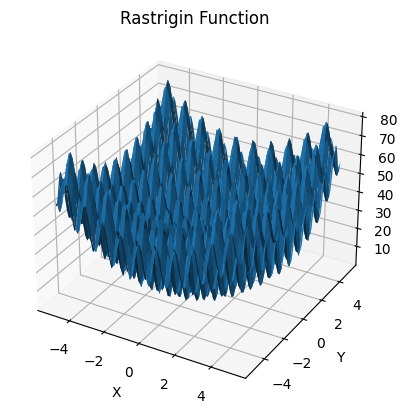

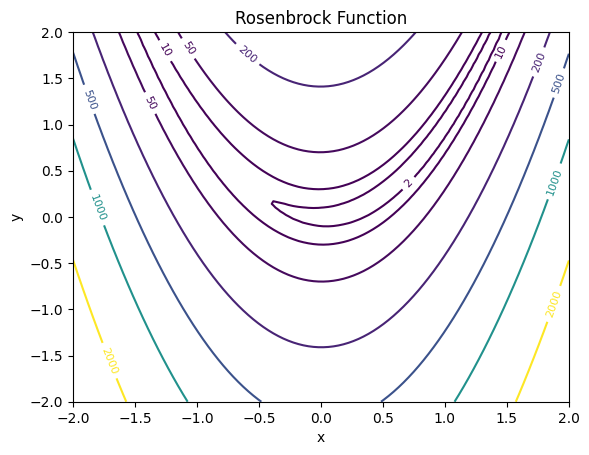

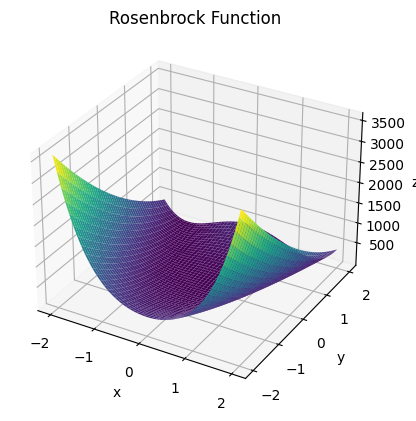

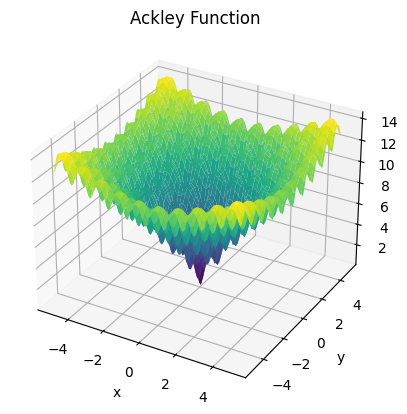

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue Apr 18 05:29:28 2023

@author: Fawzia
"""

import numpy as np
import math

def distance(x1, x2):
    return np.linalg.norm(x1 - x2)

def attractiveness(beta, r):
    return math.exp(-beta * r**2)

def move(fireflies, lightn, alpha, beta, gamma):
    for i, firefly in enumerate(fireflies):
        for j, other_firefly in enumerate(fireflies):
            if lightn[j] > lightn[i]:
                r = distance(firefly, other_firefly)
                beta_i = beta * math.exp(-gamma * r**2)
                attract = attractiveness(beta_i, r)
                fireflies[i] += attract * alpha * (other_firefly - firefly) + alpha * np.random.randn(*firefly.shape)
    return fireflies

def optimize(objective_func, dim, n, alpha=0.5, beta=1, gamma=2, theta=0.97, iterations=100):
    fireflies = np.random.rand(n, dim)
    lightn = np.zeros(n)
    for i in range(n):
        lightn[i] = objective_func(fireflies[i])
    best = np.argmin(lightn)
    global_best = fireflies[best]
    for t in range(iterations):
        fireflies = move(fireflies, lightn, alpha, beta, gamma)
        for i in range(n):
            lightn[i] = objective_func(fireflies[i])
        best = np.argmin(lightn)
        if lightn[best] < objective_func(global_best):
            global_best = fireflies[best]
        alpha *= theta
    return global_best, objective_func(global_best)


def objective_func(x):
    return sum(x**2)

dim = 10
n = 50
alpha = 0.5
beta = 1
gamma = 2
theta = 0.97
iterations = 100

best, score = optimize(objective_func, dim, n, alpha, beta, gamma, theta, iterations)
print("\n\nsphere Function:")
print("Best solution:", best)
print("Objective score:", score)






#Rastrigin Function:   
#f(x) = A*n + sum(x_i^2 - A*cos(2*pi*x_i)), i=1,...,n
       
def rastrigin(x):
    A = 10
    n = len(x)
    return A*n + sum([xi**2 - A*math.cos(2*math.pi*xi) for xi in x])

dim = 10
n = 50
alpha = 0.5
beta = 1
gamma = 2
theta = 0.97
iterations = 100

best, score = optimize(rastrigin, dim, n, alpha, beta, gamma, theta, iterations)

print("\n\nRastrigin Function:")
print("Best solution:", best)
print("Objective score:", score)
   
    
#Rosenbrock Function:
#f(x) = sum(100*(x_{i+1} - x_i^2)^2 + (1 - x_i)^2), i=1,...,n-1

def rosenbrock(x):
    n = len(x)
    return sum([100*(x[i+1] - x[i]**2)**2 + (1 - x[i])**2 for i in range(n-1)])

dim = 10
n = 50
alpha = 0.5
beta = 1
gamma = 2
theta = 0.97
iterations = 100

best, score = optimize(rosenbrock, dim, n, alpha, beta, gamma, theta, iterations)

print("\n\nRosenbrock Function:")
print("Best solution:", best)
print("Objective score:", score)



#Ackley Function:
#f(x) = -a * exp(-b * sqrt(1/n * sum(x_i^2))) - exp(1/n * sum(cos(c*x_i))) + a + e


def ackley(x):
    n = len(x)
    a = 20
    b = 0.2
    c = 2*math.pi
    sum1 = sum([xi**2 for xi in x])
    sum2 = sum([math.cos(c*xi) for xi in x])
    term1 = -a*math.exp(-b*math.sqrt(1/n*sum1))
    term2 = -math.exp(1/n*sum2)
    return term1 + term2 + a + math.e

dim = 10
n = 50
alpha = 0.5
beta = 1
gamma = 2
theta = 0.97
iterations = 100

best, score = optimize(ackley, dim, n, alpha, beta, gamma, theta, iterations)

print("\n\nAckley Function:")
print("Best solution:", best)
print("Objective score:", score)
   
    
#####plots
import matplotlib.pyplot as plt


###plot rastrigin Function

# Rastrigin Function

# Define function to plot in 3D
def rastrigin(x, y):
    A = 10
    n = 2
    return A*n + (x**2 - A*np.cos(2*np.pi*x)) + (y**2 - A*np.cos(2*np.pi*y))

# Create a meshgrid
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rastrigin(X, Y)

# Create a figure and add a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z)

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Rastrigin Function')

# Show the plot
plt.show()



###plot Rosenbrock Functionin 2D

def plot_rosenbrock():
    fig, ax = plt.subplots()

    X = Y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(X, Y)
    Z = rosenbrock([X,Y])

    levels = [0, 2, 10, 50, 200, 500, 1000, 2000]
    cs = ax.contour(X, Y, Z, levels=levels, cmap='viridis')
    ax.clabel(cs, inline=True, fontsize=8)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Rosenbrock Function')

    plt.show()

plot_rosenbrock()

#plot Rosenbrock Function in 3D
def plot_rosenbrock_3d():
    #fig = plt.figure()
    ax = plt.axes(projection='3d')

    X = Y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(X, Y)
    Z = rosenbrock([X,Y])

    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title('Rosenbrock Function')

    plt.show()

plot_rosenbrock_3d()


###plot Ackley function in 3D

def ackley(x):
    n = len(x)
    a = 20
    b = 0.2
    c = 2*math.pi
    sum1 = sum([xi**2 for xi in x])
    sum2 = sum([math.cos(c*xi) for xi in x])
    term1 = -a*math.exp(-b*math.sqrt(1/n*sum1))
    term2 = -math.exp(1/n*sum2)
    return term1 + term2 + a + math.e

# create a meshgrid of x and y values
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)

# evaluate the Ackley function on the meshgrid
Z = np.array([ackley([x,y]) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = Z.reshape(X.shape)

# plot the function in 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Ackley Function')

plt.show()
  
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    